Testinate:

In [20]:
from src.assignment2.simulation import HospitalSimulation, PatientState, WardType, WardConfig, WardsConfigurations, HospitalConfiguration, hist_plot, hist_comp_plot, barplot
from scipy import stats
import numpy as np
import seaborn as sns
import pickle

In [4]:

P = np.zeros([6,6])
P[0, :] = [0.0, 0.05, 0.10, 0.05, 0.80, 0.0]
P[1, :] = [0.20, 0.0, 0.50, 0.15, 0.15, 0.0]
P[2, :] = [0.30, 0.20, 0.0, 0.20, 0.30, 0.0]
P[3, :] = [0.35, 0.30, 0.05, 0.0, 0.30, 0.0]
P[4, :] = [0.20, 0.10, 0.60, 0.10, 0.0, 0.0] 
P[5, :] = [0.20, 0.20, 0.20, 0.20, 0.20, 0.0]

arr_Times = [14.5, 11.0, 8.0, 6.5, 5.0, 13.0]

len_stay = [2.9, 4.0, 4.5, 1.4, 3.9, 2.2]

urgency = [7, 5, 2, 10, 5, 0]

bed_capacity = [55, 40, 30, 20, 20, 0]

In [5]:
configs = [
    WardConfig(
        bed_capacity=55, 
        urgency=7, 
        mean_arrival_time=1/14.5, 
        mean_stay_time=2.9),
    WardConfig(40, 5, 1/11, 4),
    WardConfig(30, 2, 1/8, 4.5),
    WardConfig(20, 10, 1/6.5, 1.4),
    WardConfig(20, 5, 1/5, 3.9),
    WardConfig(0, 0, 1/13, 2.2)
]
std_configs = WardsConfigurations(configs)

std_switch = {
    WardType.A: list(P[0, :]),
    WardType.B: list(P[1, :]),
    WardType.C: list(P[2, :]),
    WardType.D: list(P[3, :]),
    WardType.E: list(P[4, :]),
    WardType.F: list(P[5, :])
}

def mean_exp_dist(mean_time):
    return stats.expon.rvs(scale=mean_time)

In [6]:
sim_config = HospitalConfiguration(std_configs, std_switch, mean_exp_dist, mean_exp_dist)
H_Sim = HospitalSimulation(sim_config)
N = 10

In [7]:
Simz0 = H_Sim.sim_multiple_without_f(n=100)

In [5]:
Simz1 = H_Sim.simulate_only_occupation(n=100)

In [6]:
Simz2 = H_Sim.simulate_already_stolen(n=100)

In [6]:
exp_penDF = Simz0.expected_penalty()
expected_penalty = exp_penDF['mean']

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [7]:

Simz3 = H_Sim.simulate_expected_penalty(n=100, expected_penalty=expected_penalty)

In [14]:
simOcc_Penalty = H_Sim.simulate_occupation_and_penalty(n=100)

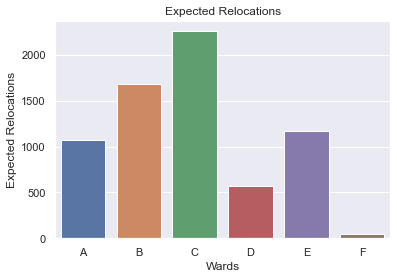

In [25]:
barplot(simOcc_Penalty.expected_relocations(), label='Expected Relocations')

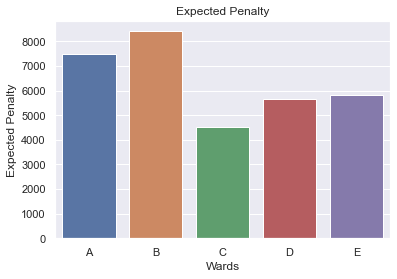

In [24]:
ward_no_f = [ward for ward in WardType if ward is not WardType.F]

a = simOcc_Penalty.expected_penalty(ward_no_f).copy()

barplot(a, wards=ward_no_f, label='Expected Penalty')

In [18]:
Only_Occ_expctPen = simOnlyOcc.expected_total_penalty()
Alrd_Takn_expctPen = simAlreadyTaken.expected_total_penalty()
Exp_Pen_expctPen = simExpectedPenalty.expected_total_penalty()
Occ_Penalty_expctPen = simOcc_Penalty.expected_total_penalty()
initial_expctPen = simInitial.expected_total_penalty()


In [11]:
Only_Occ_expctPen[1:]

(38990.97, (38025.812998539346, 39956.127001460656))

In [12]:
Alrd_Takn_expctPen[1:]

(36102.99, (34764.64972730472, 37441.330272695275))

In [13]:
Exp_Pen_expctPen[1:]

(48461.02, (47917.913484325785, 49004.12651567421))

In [16]:
Occ_Penalty_expctPen[1:]

(31933.58, (31147.813557666075, 32719.34644233393))

In [19]:
initial_expctPen[1:]

(11106.41, (10991.949477877528, 11220.870522122472))

In [26]:
Only_Occ_expRelo = simOnlyOcc.expected_relocations()
Alrd_Takn_expRelo = simAlreadyTaken.expected_relocations()
Exp_Pen_expRelo = simExpectedPenalty.expected_relocations()
Occ_Penalty_expRelo = simOcc_Penalty.expected_relocations()
initial_expRelo = simInitial.expected_relocations()

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [41]:
Only_Occ_total = np.sum(simOnlyOcc.expected_relocations()['mean']) + np.sum(simOnlyOcc.expected_admissions()['mean'])
Alrd_Takn_total = np.sum(simAlreadyTaken.expected_relocations()['mean']) + np.sum(simAlreadyTaken.expected_admissions()['mean'])
Exp_Pen_total = np.sum(simExpectedPenalty.expected_relocations()['mean']) + np.sum(simExpectedPenalty.expected_admissions()['mean'])
#Occ_Penalty_total = simOcc_Penalty.expected_relocations() + simOcc_Penalty.expected_admissions()
initial_total = np.sum(simInitial.expected_relocations()['mean']) + np.sum(simInitial.expected_admissions()['mean'])

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [38]:
#Occ_Penalty_total = np.sum(simOcc_Penalty.expected_relocations()['mean']) + np.sum(simOcc_Penalty.expected_admissions()['mean'])

np.sum(Exp_Pen_expRelo['mean'])/Exp_Pen_total

0.3579456845522651

In [8]:
with open('Simz3.pickle', 'wb') as handle:
    pickle.dump(Simz3, handle)

In [3]:


with open('simAlreadyTaken.pickle', 'rb') as handle:
    simAlreadyTaken = pickle.load(handle)

with open('simExpectedPenalty.pickle', 'rb') as handle:
    simExpectedPenalty = pickle.load(handle)

with open('simOnlyOcc.pickle', 'rb') as handle:
    simOnlyOcc = pickle.load(handle)

In [17]:
with open('simInitial.pickle', 'rb') as handle:
    simInitial = pickle.load(handle)

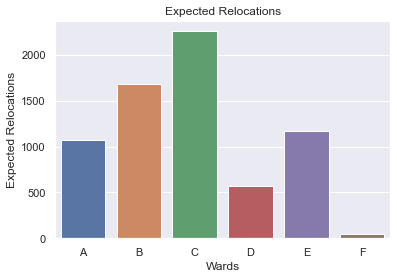

In [62]:
barplot(simOcc_Penalty.expected_relocations(), label='Expected Relocations')

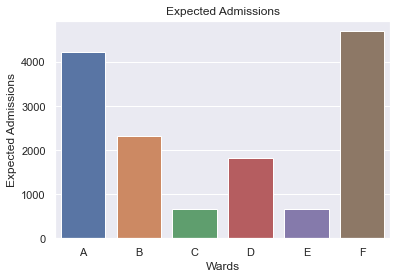

In [61]:
barplot(simOcc_Penalty.expected_admissions(), label='Expected Admissions')

In [43]:
initial_total = simInitial.expected_relocations()['mean'] + simInitial.expected_admissions()['mean']

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2162: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\scipy\stats\_distn_infrastructure.py:2163: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [51]:
prob_all_occ_Initial=simInitial.expected_relocations()['mean'][0:5]/initial_total[0:5]

In [52]:
prob_all_occ_Initial

A    0.044303
B    0.209924
C    0.337585
D    0.028339
E    0.284750
Name: mean, dtype: float64

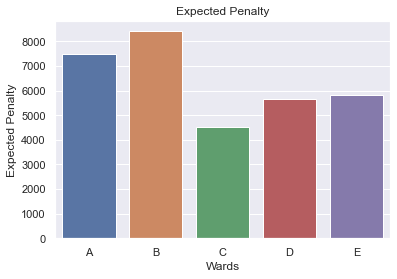

In [60]:
ward_no_f = [ward for ward in WardType if ward is not WardType.F]

a = simOcc_Penalty.expected_penalty(ward_no_f).copy()

barplot(a, wards=ward_no_f, label='Expected Penalty')